# Pre trained network
![imagen](https://www.researchgate.net/publication/336874848/figure/fig1/AS:819325225144320@1572353764073/Illustrations-of-transfer-learning-a-neural-network-is-pretrained-on-ImageNet-and.png)

Estas son las arquitecturas de redes neuronales más utilizadas en la comunidad. Para más detalle sobre el funcionamiento de cada red, consultar el [Hands on Machine Learning for Python](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch14.html#cnn_chapter).
* VGG-16
* VGG-19
* Inception V3
* XCeption
* ResNet-50

Las redes se pueden incorporar entrenadas, o sin entrenar.

## ResNet50V2

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

# librería de apoyo para utilizar redes preentrenadas
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [5]:
# con esta instrucción se está descargando el modelo completo original

base_model = ResNet50V2(input_shape=(224, 224, 3),      #permite ajustar los parámetros de las imágenes que se inserten en la red neuronal
                       include_top=True,
                       weights = "imagenet",
                       classifier_activation='softmax')

In [6]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

Cargamos algunas imagenes desde local, para ver qué tal funciona la red ResNet50V2 ya entrenada.

In [7]:
import os


def read_data(path):
    X = []

    for file in os.listdir(path):
        image = imread(path + '/' + file)
        smallimage = cv2.resize(image, (224, 224))  # redimensionamiento a la resolución de entrada al modelo
        print(path + '/' + file)
        
        X.append(smallimage)

    return np.array(X)
    

x_test = read_data('img')

# Procesar las imagenes tal y como entran en el modelo
x_test = preprocess_input(x_test)
print(x_test.shape)

img/00000_00000_00025.png
img/0_bear-1.jpg
img/1_cat.8016.jpg
img/2_cat.8037.jpg
img/3_dog.11856.jpg
img/4_dog.11857.jpg
img/5_gvt.png
img/6_horse.jpg
img/7_karate.jpg
img/8_pizza.jpg
(10, 224, 224, 3)


In [8]:
preds = base_model.predict(x_test)

decodes = decode_predictions(preds, top=5)  # función importada que devuelve las 5 probabilidades más altas

for i, j in enumerate(decodes):
    print('##################')
    print(i)
    for i, decode in enumerate(j):
        print('Predicted:\n', decode[1], decode[2])

##################
0
Predicted:
 pop_bottle 0.8737569
Predicted:
 bottlecap 0.029593082
Predicted:
 street_sign 0.028837401
Predicted:
 beer_bottle 0.017046208
Predicted:
 scoreboard 0.016721783
##################
1
Predicted:
 brown_bear 0.99944395
Predicted:
 chow 0.00054155604
Predicted:
 American_black_bear 8.780954e-06
Predicted:
 ice_bear 1.1076125e-06
Predicted:
 howler_monkey 4.4061477e-07
##################
2
Predicted:
 Egyptian_cat 0.6498504
Predicted:
 Siamese_cat 0.16787297
Predicted:
 tiger_cat 0.060449366
Predicted:
 lynx 0.024389759
Predicted:
 tabby 0.017880322
##################
3
Predicted:
 Egyptian_cat 0.82098454
Predicted:
 lynx 0.12679395
Predicted:
 Siamese_cat 0.021530533
Predicted:
 tabby 0.020569634
Predicted:
 tiger_cat 0.0074053714
##################
4
Predicted:
 Rottweiler 0.73290956
Predicted:
 Brabancon_griffon 0.08508457
Predicted:
 Staffordshire_bullterrier 0.031059442
Predicted:
 EntleBucher 0.023099277
Predicted:
 Doberman 0.01987154
###############

## VGG16

### Ejemplo de como entrenar una red a partir de una red existente (transfer learning)
En este caso vamos a importar la red VGG16, que utilizaremos como red preentrenada y completaremos con una fully connected layer. 

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [2]:
batch_size = 32
img_height = 48
img_width = 48

data_dir = os.getcwd() + os.sep + "img" + os.sep + 'feeling' + os.sep + 'train'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6176 files belonging to 2 classes.
Using 4941 files for training.
Found 6176 files belonging to 2 classes.
Using 1235 files for validation.


In [5]:
print(train_ds.class_names)


['happy', 'sadness']


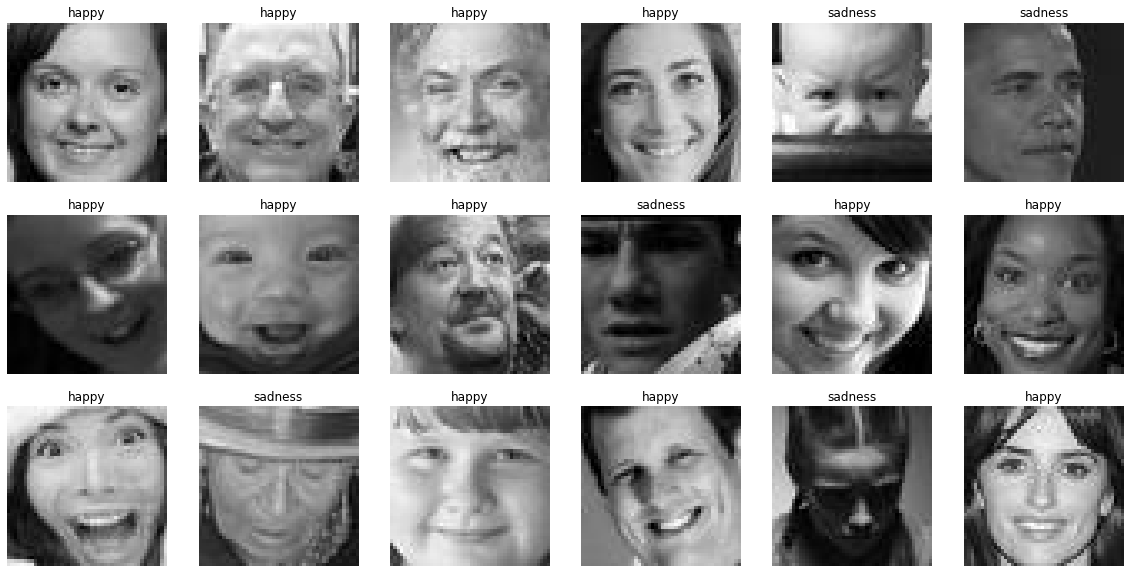

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
  for i in range(18):
    ax = plt.subplot(3, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [4]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 48, 48, 3)
(32,)


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (img_height, img_height, 3),
                  include_top=False,        # no se incluye la capa de salida con la que se entrenó originalmente
                  weights = 'imagenet')
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [6]:
# no se entrenan las capas previamente entrenadas
for layer in base_model.layers:
    layer.trainable = False

# se concatena la primera capa (base_model.input) con la última capa (base_model.output) - es el modelo sin entrenar (solo con pesos 'residuales')
model = tf.keras.models.Model(base_model.input, base_model.output)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])

In [7]:
vgghist = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 5,
                    verbose=1)

Epoch 1/5
155/155 [==============================] - 31s 196ms/step - loss: 7.2463 - acc: 9.3751e-04 - val_loss: 7.4342 - val_acc: 0.0024
Epoch 2/5
155/155 [==============================] - 36s 231ms/step - loss: 7.2445 - acc: 8.1082e-04 - val_loss: 7.4311 - val_acc: 0.0022
Epoch 3/5
155/155 [==============================] - 36s 234ms/step - loss: 7.2462 - acc: 8.1082e-04 - val_loss: 7.4328 - val_acc: 0.0023
Epoch 4/5
155/155 [==============================] - 35s 227ms/step - loss: 7.2452 - acc: 7.8548e-04 - val_loss: 7.4310 - val_acc: 0.0024
Epoch 5/5
155/155 [==============================] - 35s 223ms/step - loss: 7.2461 - acc: 7.6648e-04 - val_loss: 7.4306 - val_acc: 0.0024


In [34]:

import numpy as np
import pandas as pd
import cv2 as cv

from matplotlib.image import imread
import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join


df_dict = []
data_path = os.getcwd() + os.sep + "img" + os.sep + 'feeling' + os.sep + 'test'
only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]
for image_name in only_image_names:
    if ".jpg" in image_name:       # se toman sólo las imágenes con un 1 al final del nombre para no tardar tanto en generar las predicciones
        image_fullpath = data_path + os.sep + image_name
        image_cv = cv.imread(image_fullpath)     # con el 0 se lee en blanco y negro, sin nada, se lee en color

        # las imagenes originales tienen tamañanos distintos  -> con esta función se ponen en el tamaño común para todas (y será el tamaño de entrada al modelo)
        image_cv = cv.resize(image_cv, (48, 48)) 
        df_dict.append({'image':image_cv})

df = pd.DataFrame(df_dict)
X_test = np.stack(np.array(df["image"]))


In [35]:
X_test.shape

(4117, 48, 48, 3)

In [36]:
%%time
predictions = model(X_test)

Wall time: 22.3 s


In [18]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import datasets, layers, models

base_model = VGG16(input_shape = (img_height, img_height, 3),
                  include_top=False,        # no se incluye la capa de salida con la que se entrenó originalmente
                  weights = 'imagenet')

# no se entrenan las capas previamente entrenadas
for layer in base_model.layers:
    layer.trainable = False

    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x0 = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x1 = layers.Dense(512, activation='relu')(x0)

# Add a dropout rate of 0.5
x2 = layers.Dropout(0.5)(x1)

# Add a final sigmoid layer for classification
#x3 = layers.Dense(1, activation='sigmoid')(x2)

x3 = layers.Dense(2 , activation='softmax')(x2)

# se concatena la primera capa (base_model.input) con la última capa (x3)
model = tf.keras.models.Model(base_model.input, x3)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [19]:
vgghist = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 5,
                    verbose=1)

Epoch 1/5
155/155 [==============================] - 30s 193ms/step - loss: 4.9146 - acc: 0.6211 - val_loss: 1.8242 - val_acc: 0.6623
Epoch 2/5
155/155 [==============================] - 34s 220ms/step - loss: 1.3409 - acc: 0.6778 - val_loss: 0.9563 - val_acc: 0.6915
Epoch 3/5
155/155 [==============================] - 34s 221ms/step - loss: 0.7103 - acc: 0.7268 - val_loss: 0.7871 - val_acc: 0.6794
Epoch 4/5
155/155 [==============================] - 35s 227ms/step - loss: 0.5175 - acc: 0.7608 - val_loss: 0.7781 - val_acc: 0.6874
Epoch 5/5
155/155 [==============================] - 35s 223ms/step - loss: 0.4690 - acc: 0.7849 - val_loss: 0.7718 - val_acc: 0.6915


In [37]:
%%time
predictions = model(X_test)

Wall time: 20.5 s


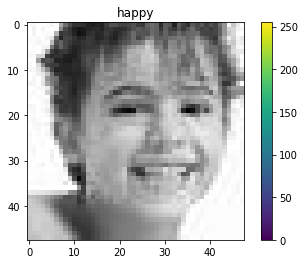

In [27]:
img_check = 10

plt.figure()
plt.imshow(X_test[img_check])
plt.colorbar()
plt.title(train_ds.class_names[np.argmax(predictions[img_check])])
plt.grid(False)
plt.show()

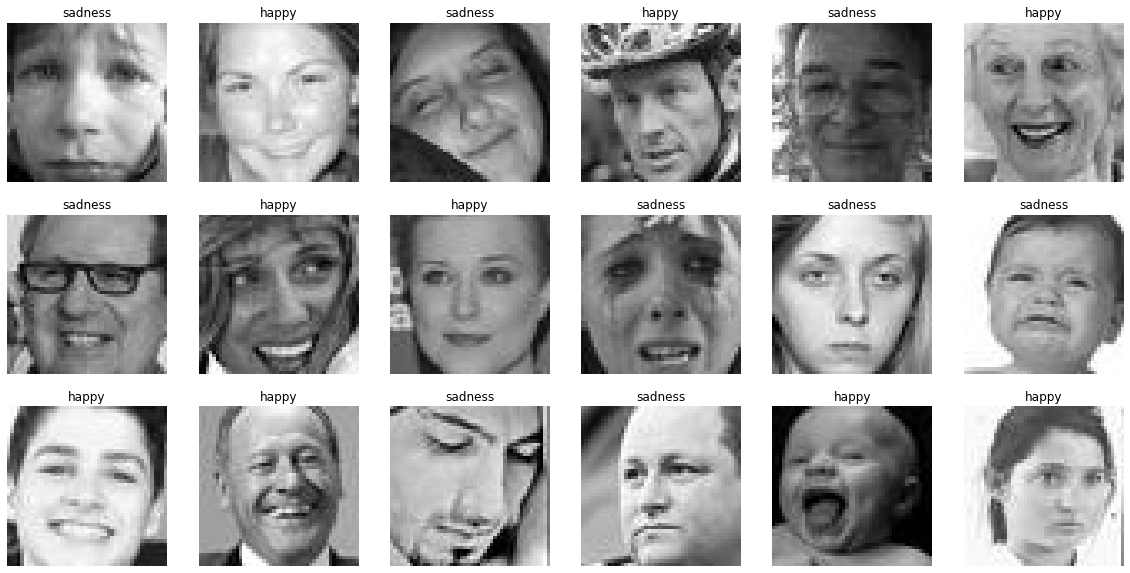

In [43]:
plt.figure(figsize=(20, 10))
for i in range(18):
    ax = plt.subplot(3, 6, i + 1)
    plt.imshow(X_test[i])
    plt.title(train_ds.class_names[np.argmax(predictions[i])])
    plt.axis("off")

In [41]:
acum = 0
point_list = []
for i in range(predictions.shape[0]):
    if np.argmax(predictions[i]) == 1:
        acum += 1
        point_list.append(i)
acum

2017

In [48]:
img_submission = []
data_path = os.getcwd() + os.sep + "img" + os.sep + 'feeling' + os.sep + 'test'
only_image_names = [f for f in listdir(data_path) if isfile(join(data_path, f))]
for image_name in only_image_names:
    if ".jpg" in image_name:
        img_submission.append(image_name.replace('.jpg',''))

In [45]:
predictions_submit = []
for i in range(predictions.shape[0]):
    predictions_submit.append(train_ds.class_names[np.argmax(predictions[i])])

In [49]:
submission = pd.DataFrame({"id_img": img_submission, "label": predictions_submit})

In [50]:
submission.to_csv("submission.csv", index = False) #muy importante el index = False

## Resnet v2

https://keras.io/api/applications/resnet/

In [52]:

from tensorflow.keras.applications.resnet_v2 import ResNet152V2

base_model_resnet = ResNet152V2(input_shape = (img_height, img_height,3),
                        include_top = False,
                        weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

In [56]:
x = layers.Flatten()(base_model_resnet.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model_resnet.input, x)

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])

inc_history = model.fit(train_ds,
                       validation_data = val_ds,
                       steps_per_epoch = 100,
                       epochs = 2,
                       verbose=1)

Epoch 1/2
100/100 [==============================] - 203s 2s/step - loss: 0.8975 - acc: 0.5350 - val_loss: 172.7441 - val_acc: 0.5223
Epoch 2/2
100/100 [==============================] - 106s 1s/step - loss: 0.7122 - acc: 0.5215 - val_loss: 375.1664 - val_acc: 0.5223


### Inception - No se puede si no son 75x75 como mínimo

In [49]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (75, 75,3),
                        include_top = False,
                        weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

87916544/87910968 [==============================] - 9s 0us/step


In [50]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['acc'])

inc_history = model.fit(train_ds,
                       validation_data = val_ds,
                       steps_per_epoch = 100,
                       epochs = 2)

Epoch 1/2


ValueError: in user code:

    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    Z:\Data_Science\Software\Python\Python_3.6.4\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:270 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 75, 75, 3), found shape=(None, 48, 48, 3)
